In [1]:
#Importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from statsmodels.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
#Reading the file - taiwan_real_estate.csv - and storing it in a dataframe object
taiwanRealEstate = pd.read_csv('taiwan_real_estate.csv')
taiwanRealEstate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [3]:
#Investigating the shape of the dataframe
taiwanRealEstate.shape

(414, 4)

In [4]:
#Investigating the datatypes of the variables in the dataframe
taiwanRealEstate.dtypes

dist_to_mrt_m      float64
n_convenience        int64
house_age_years     object
price_twd_msq      float64
dtype: object

In [5]:
#Investigating unique values in house_age_years
taiwanRealEstate['house_age_years'].value_counts()

0 to 15     190
15 to 30    129
30 to 45     95
Name: house_age_years, dtype: int64

In [6]:
#Updating house_age_years from object to categorical datatype
cat_dict = {'0 to 15' : '0-15',
            '15 to 30' : '15-30',
            '30 to 45' : '30-45'
           }

taiwanRealEstate['house_age_years'] = taiwanRealEstate['house_age_years'].map(cat_dict)
taiwanRealEstate['house_age_years'] = taiwanRealEstate['house_age_years'].astype('category')
taiwanRealEstate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30-45,11.467474
1,306.59470,9,15-30,12.768533
2,561.98450,5,0-15,14.311649
3,561.98450,5,0-15,16.580938
4,390.56840,5,0-15,13.040847


In [7]:
#Checking the updated datatype of house_age_years
taiwanRealEstate.house_age_years.dtype

CategoricalDtype(categories=['0-15', '15-30', '30-45'], ordered=False)

In [8]:
#Checking the dataframe for any NA values
taiwanRealEstate.isna().any()

dist_to_mrt_m      False
n_convenience      False
house_age_years    False
price_twd_msq      False
dtype: bool

In [9]:
#Description of the dataframe
taiwanRealEstate.describe()

,dist_to_mrt_m,n_convenience,price_twd_msq
count,414.000000,414.000000,414.000000
mean,1083.885689,4.094203,11.491738
std,1262.109595,2.945562,4.116940
min,23.382840,0.000000,2.299546
25%,289.324800,1.000000,8.381241
50%,492.231300,4.000000,11.633888
75%,1454.279000,6.000000,14.099849
max,6488.021000,10.000000,35.552194


In [ ]:
"""
From the above description of the dataframe we could infer the following:
1. The difference in mean and median of dist_to_mrt_m is very large which means that the distribution of
   dist_to_mrt_m is highly skewed.
2. The distribution of dist_to_mrt_m and price_twd_msq seems to be skewed on the right side as 
   the right tail (max - 75%) is more than the left tail (25% - min)

"""

In [11]:
#Correlation matrix 
taiwanRealEstate.corr()

,dist_to_mrt_m,n_convenience,price_twd_msq
dist_to_mrt_m,1.000000,-0.602519,-0.673613
n_convenience,-0.602519,1.000000,0.571005
price_twd_msq,-0.673613,0.571005,1.000000


In [12]:
# The above correlation matrix shows strong relationship among the variables

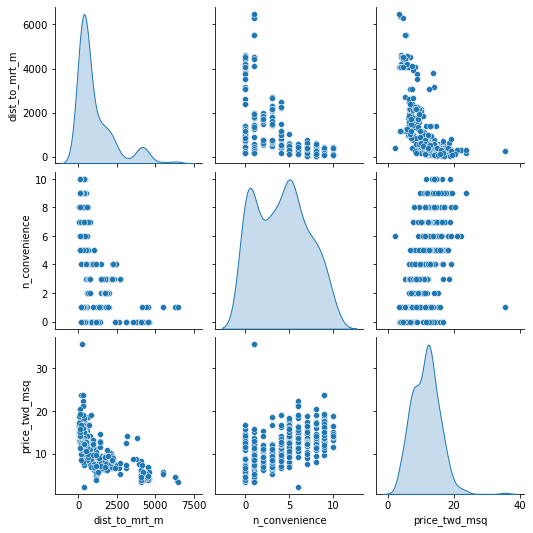

In [13]:
#Scatterplot to check relationship between variables
sns.pairplot(taiwanRealEstate, diag_kind = 'kde')

In [ ]:
"""
From the above scatterplot we could infer the following:
1. There appears to be a strong relationship between dist_to_mrt_m and price_twd_msq. Might need transformation?
2. There appears to be an outlier in the price_twd_msq, which needs to be further investigated

"""

In [15]:
#Inspecting the possible outlier in the dataset
taiwanRealEstate[taiwanRealEstate['price_twd_msq'] >25]

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
270,252.5822,1,0-15,35.552194


In [16]:
#Removing possible outlier from the dataset
taiwanRealEstate = taiwanRealEstate[taiwanRealEstate['price_twd_msq'] <25]
taiwanRealEstate.shape

(413, 4)

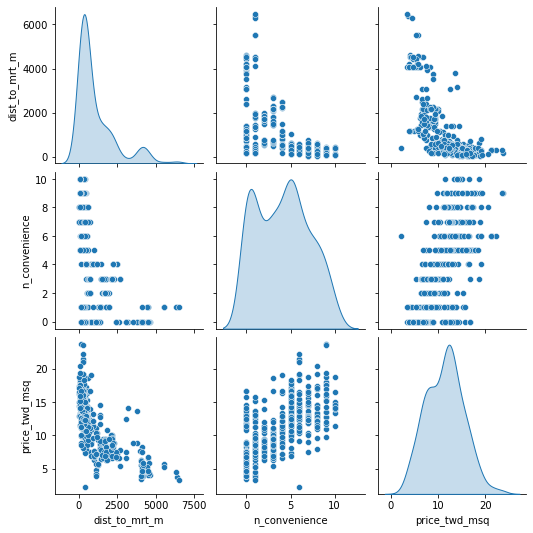

In [17]:
#Scatterplot without the outlier
sns.pairplot(taiwanRealEstate, diag_kind = 'kde')

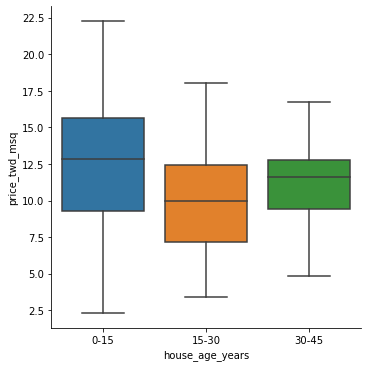

In [18]:
#Boxplot for categorical variable - house_age_years
sns.catplot(x = 'house_age_years', y = 'price_twd_msq', data = taiwanRealEstate, kind = 'box', sym = '')

In [ ]:
"""
From the above scatterplot we could infer the following:
1. Since the median (50th percentile) of the categories vary, it is advisable to 
   include the categorical variable in the model
"""

<ipython-input-20-dd2bce526e53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taiwanRealEstate['log_dist_to_mrt_m'] = log_dist_to_mrt_m


<AxesSubplot:xlabel='log_dist_to_mrt_m', ylabel='price_twd_msq'>

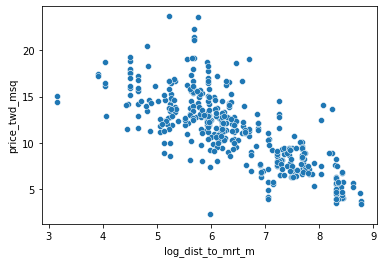

In [20]:
#Applying log transformation on dist_to_mrt_m
log_dist_to_mrt_m = np.log(taiwanRealEstate['dist_to_mrt_m'])
taiwanRealEstate['log_dist_to_mrt_m'] = log_dist_to_mrt_m
sns.scatterplot(x = 'log_dist_to_mrt_m', y = 'price_twd_msq', data = taiwanRealEstate)

In [21]:
#Performing one hot encoding on house_age_years
encode_dict = {True : 1, False : 0}

house_age_0_15 = taiwanRealEstate['house_age_years'] == '0-15'
house_age_15_30 = taiwanRealEstate['house_age_years'] == '15-30'
house_age_30_45 = taiwanRealEstate['house_age_years'] == '30-45'

taiwanRealEstate['house_age_0_15'] = house_age_0_15.map(encode_dict)
taiwanRealEstate['house_age_15_30'] = house_age_15_30.map(encode_dict)
taiwanRealEstate['house_age_30_45'] = house_age_30_45.map(encode_dict)
taiwanRealEstate.head()

<ipython-input-21-1d88085ff48f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taiwanRealEstate['house_age_0_15'] = house_age_0_15.map(encode_dict)
<ipython-input-21-1d88085ff48f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taiwanRealEstate['house_age_15_30'] = house_age_15_30.map(encode_dict)
<ipython-input-21-1d88085ff48f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,log_dist_to_mrt_m,house_age_0_15,house_age_15_30,house_age_30_45
0,84.87882,10,30-45,11.467474,4.441225,0,0,1
1,306.59470,9,15-30,12.768533,5.725527,0,1,0
2,561.98450,5,0-15,14.311649,6.331474,1,0,0
3,561.98450,5,0-15,16.580938,6.331474,1,0,0
4,390.56840,5,0-15,13.040847,5.967603,1,0,0


In [22]:
#Splitting data into train and test sets to perform regression
x = taiwanRealEstate.drop(['price_twd_msq'], axis = 'columns')
y = taiwanRealEstate[['price_twd_msq']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)
train_set = pd.concat([y_train, x_train], axis = 1)
train_set.head()

,price_twd_msq,dist_to_mrt_m,n_convenience,house_age_years,log_dist_to_mrt_m,house_age_0_15,house_age_15_30,house_age_30_45
11,17.579425,90.45606,9,0-15,4.504864,1,0,0
179,12.889561,438.85130,1,0-15,6.084161,1,0,0
260,9.288956,1485.09700,4,15-30,7.303235,0,1,0
308,16.036309,289.32480,5,15-30,5.667550,0,1,0
41,5.506808,4066.58700,0,15-30,8.310559,0,1,0


In [23]:
#Performing Linear Regression
model1 = smf.ols('price_twd_msq ~ log_dist_to_mrt_m + house_age_0_15 + house_age_30_45', data = taiwanRealEstate)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     196.8
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           5.52e-79
Time:                        13:25:10   Log-Likelihood:                -968.09
No. Observations:                 413   AIC:                             1944.
Df Residuals:                     409   BIC:                             1960.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            27.7618      0.825     33.656      0.000      26.140      29.383
log_dist_to_mrt_m    -2.6111      0.116    -22.522      0.000      -2.839      -2.383
house_age_0_15        0.9535      0.299      3.189      0.002       0.366       1.541
house_age_30_45      -0.3040      0.352     -0.863      0.388      -0.996       0.388
==============================================================================
Omnibus:                       60.181   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.851
Skew:                           0.665   Prob(JB):                     8.83e-40
Kurtosis:                       5.946   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Calculating residual standard error of Model1
mse_result1 = result1.mse_resid
rse_result1 = np.sqrt(mse_result1)
print('The residual standard error for the above model is:',np.round(mse_result1,3))

The residual standard error for the above model is: 6.423


In [25]:
#Performing Linear Regression
model2 = smf.ols('price_twd_msq ~ log_dist_to_mrt_m + n_convenience + house_age_15_30 + house_age_30_45', data = taiwanRealEstate)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     161.8
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           8.47e-83
Time:                        13:25:10   Log-Likelihood:                -956.40
No. Observations:                 413   AIC:                             1923.
Df Residuals:                     408   BIC:                             1943.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            24.3410      1.152     21.124      0.000      22.076      26.606
log_dist_to_mrt_m    -2.0912      0.155    -13.467      0.000      -2.396      -1.786
n_convenience         0.2809      0.058      4.874      0.000       0.168       0.394
house_age_15_30      -1.1311      0.293     -3.857      0.000      -1.708      -0.555
house_age_30_45      -1.4597      0.313     -4.663      0.000      -2.075      -0.844
==============================================================================
Omnibus:                       67.380   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.951
Skew:                           0.775   Prob(JB):                     4.18e-41
Kurtosis:                       5.899   Cond. No.                         74.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Calculating residual standard error of Model2
mse_result2 = result2.mse_resid
rse_result2 = np.sqrt(mse_result2)
print('The residual standard error for the above model is:',np.round(rse_result2,3))

The residual standard error for the above model is: 2.467


In [27]:
#Performing Linear Regression
model3 = smf.ols('price_twd_msq ~ log_dist_to_mrt_m + n_convenience + house_age_0_15', data = taiwanRealEstate)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     215.4
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           8.39e-84
Time:                        13:25:11   Log-Likelihood:                -956.87
No. Observations:                 413   AIC:                             1922.
Df Residuals:                     409   BIC:                             1938.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.9210      1.194     19.196      0.000      20.574      25.268
log_dist_to_mrt_m    -2.0678      0.153    -13.485      0.000      -2.369      -1.766
n_convenience         0.2801      0.058      4.861      0.000       0.167       0.393
house_age_0_15        1.2786      0.250      5.122      0.000       0.788       1.769
==============================================================================
Omnibus:                       62.473   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.970
Skew:                           0.733   Prob(JB):                     1.50e-36
Kurtosis:                       5.727   Cond. No.                         77.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Calculating residual standard error of Model3
mse_result3 = result3.mse_resid
rse_result3 = np.sqrt(mse_result3)
print('The residual standard error for the above model is:',np.round(rse_result3,3))

The residual standard error for the above model is: 2.466


In [ ]:
"""
Upon comparing the 3 models we can infer the following:
1. Model2 and Model3 are better than Model1 in terms of the R_sq and adj_R_sq value.
2. Model2 and Model3 are better than Model1 in terms of RSE (Residual Standard Error)
3. Although both Model2 and Model3 explain the data in a similar manner i.e. they have nearly same 
   R_sq, adj_R_sq value and RSE, selecting Model3 as the best suited model and comparing it with Model1 - 
    a. Comparing in terms of quantity measures - 
        i.   It has lower RSE, and higher R_sq and adj_R_sq values
    b. Comparing in terms of quality measures - 
        i.   The p-value of the F-test tells us that atleast one of the exploratory variable is significant.
        ii.  The magnitute and sign of the coefficients seem reasonable and concur with theory
              a. With every 1 unit increase in distance, the price is reduced by 2.0678
              b. With every 1 unit increase in the number of convenience stores, the price 
                 is increases by 0.2801
              c. If the age of the house is between 0-15 years, the price increases by 1.2786.   
        iii. The p-value of the t-test is significant for all the three variables i.e. the coefficients 
             are statistically significant. 

"""

Text(0.5, 1.0, 'Histogram of residuals')

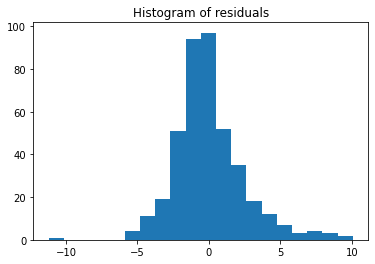

In [30]:
#Analysing residuals of Model3
residuals = result3.resid
pred_resid = pd.DataFrame(residuals)
pred_resid['predicted'] = result3.fittedvalues
pred_resid.columns = ['residuals', 'predicted']

#Histogram to check if residuals are normally distributed
plt.hist(pred_resid['residuals'], bins = 20)
plt.title('Histogram of residuals')

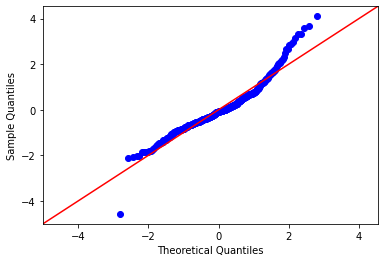

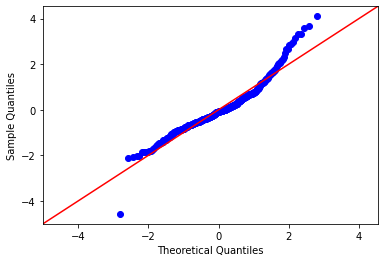

In [31]:
#Q-Q plot for the residuals to check for Normality
qqplot(data = pred_resid['residuals'], fit = True, line = '45')

In [ ]:
"""
Residual Analysis - Rule 1 - The residuals should be normally distributed

From the above histogram of the residuals, it can be seen that the residuals look nearly normal with 
a long right tail which might be due to presence of outiers in the data. 

In the q-q plot, most of the points lie on the straight line. However, one point could be seen on the left
side lying far away from the straight line which might indicate the presence of ouliers. Moreover, the points
corresponding to the right tail are also away from the straight line which in-turn hints about the presence 
of ouliers. 

"""

Text(0.5, 0.98, 'residuals vs predicted')

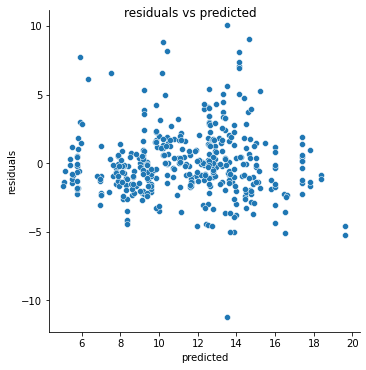

In [33]:
#Scatterplot between residuals and predicted values to check for constant variance among the residuals
#Residuals should be homoscedastic in nature
g = sns.relplot(x = 'predicted', y = 'residuals', kind = 'scatter', data = pred_resid)
g.fig.suptitle('residuals vs predicted')

In [ ]:
"""
Residual Analysis - Rule 2 - The residuals should have constant variance i.e. they should be 
homoscedastic in nature

From the above scatterplot it can be inferred that the residuals are heteroscedastic in nature i.e. 
the variance among the residuals is not constant. It can be seen that the variance among the residuals 
decreases with increase in predicted value.

"""

Text(0.5, 0.98, 'standardized_residuals vs predicted')

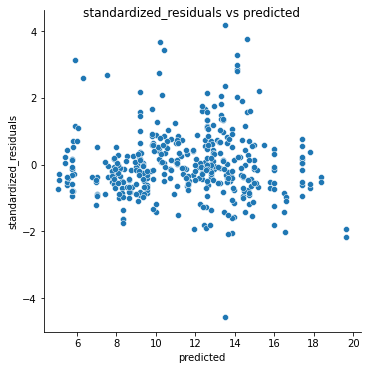

In [35]:
#Scatterplot between standardised residuals and predicted values to check for outliers, constant variance
#and serial correlation among the residuals
std_resid = result2.get_influence().resid_studentized_internal
pred_resid['standardized_residuals'] = std_resid
g = sns.relplot(x = 'predicted', y = 'standardized_residuals', data = pred_resid, kind = 'scatter')
g.fig.suptitle('standardized_residuals vs predicted')

In [ ]:
"""
Residual Analysis - Rule 3 - The residuals should be free from outliers

From the above scatterplot it can be inferred that the residuals contain a lot of outliers. Various points lie 
outside 2 standard deviation range([-2,2]) i.e. 95% CI. This also confirms our findings about heteroscedastic
nature of the residuals. Moreover, since a lot of points lie outside 2 standard deviation, it can be inferred 
that the residuals might have serial correlation among them. 

"""

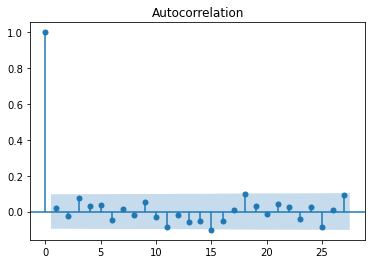

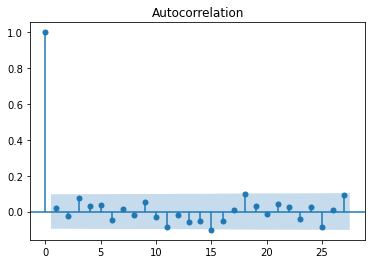

In [37]:
#ACF plot to check for autocorrelation among the residuals
plot_acf(pred_resid['residuals'])

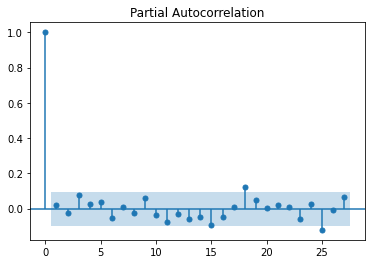

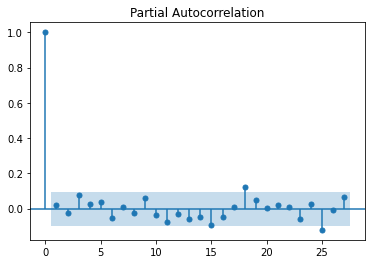

In [38]:
#PACF plot to check for autocorrelation among the residuals
plot_pacf(pred_resid['residuals'])

In [ ]:
"""
Residual Analysis - Rule 4 - The residuals should not have serial correlation (auto-correlation) among them

Both the ACF and PACF plots confirm out findings from the scatterplot of standardized_residuals vs predicted about
presence of serial correlation (auto-correlation) among the residuals. 

"""

In [ ]:
"""
Conclusion - 

We only have 414 entries in the dataset thereby making it difficult for the model to satify 
all the assumptions of regression modeling. We could try creating other models and check them against these 
assumptions but since we dont have enough entries, we are at a risk of overfitting the model. 

We would require more data in order to come up with the right definition of impact of the dependent variables 
on the price.

"""